In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(0)
# torch.manual_seed(0)
# torch.cuda.manual_seed(0)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (25, 25)

In [31]:
df = pd.read_csv('house-prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df.shape

(1460, 81)

<Figure size 1800x1800 with 0 Axes>

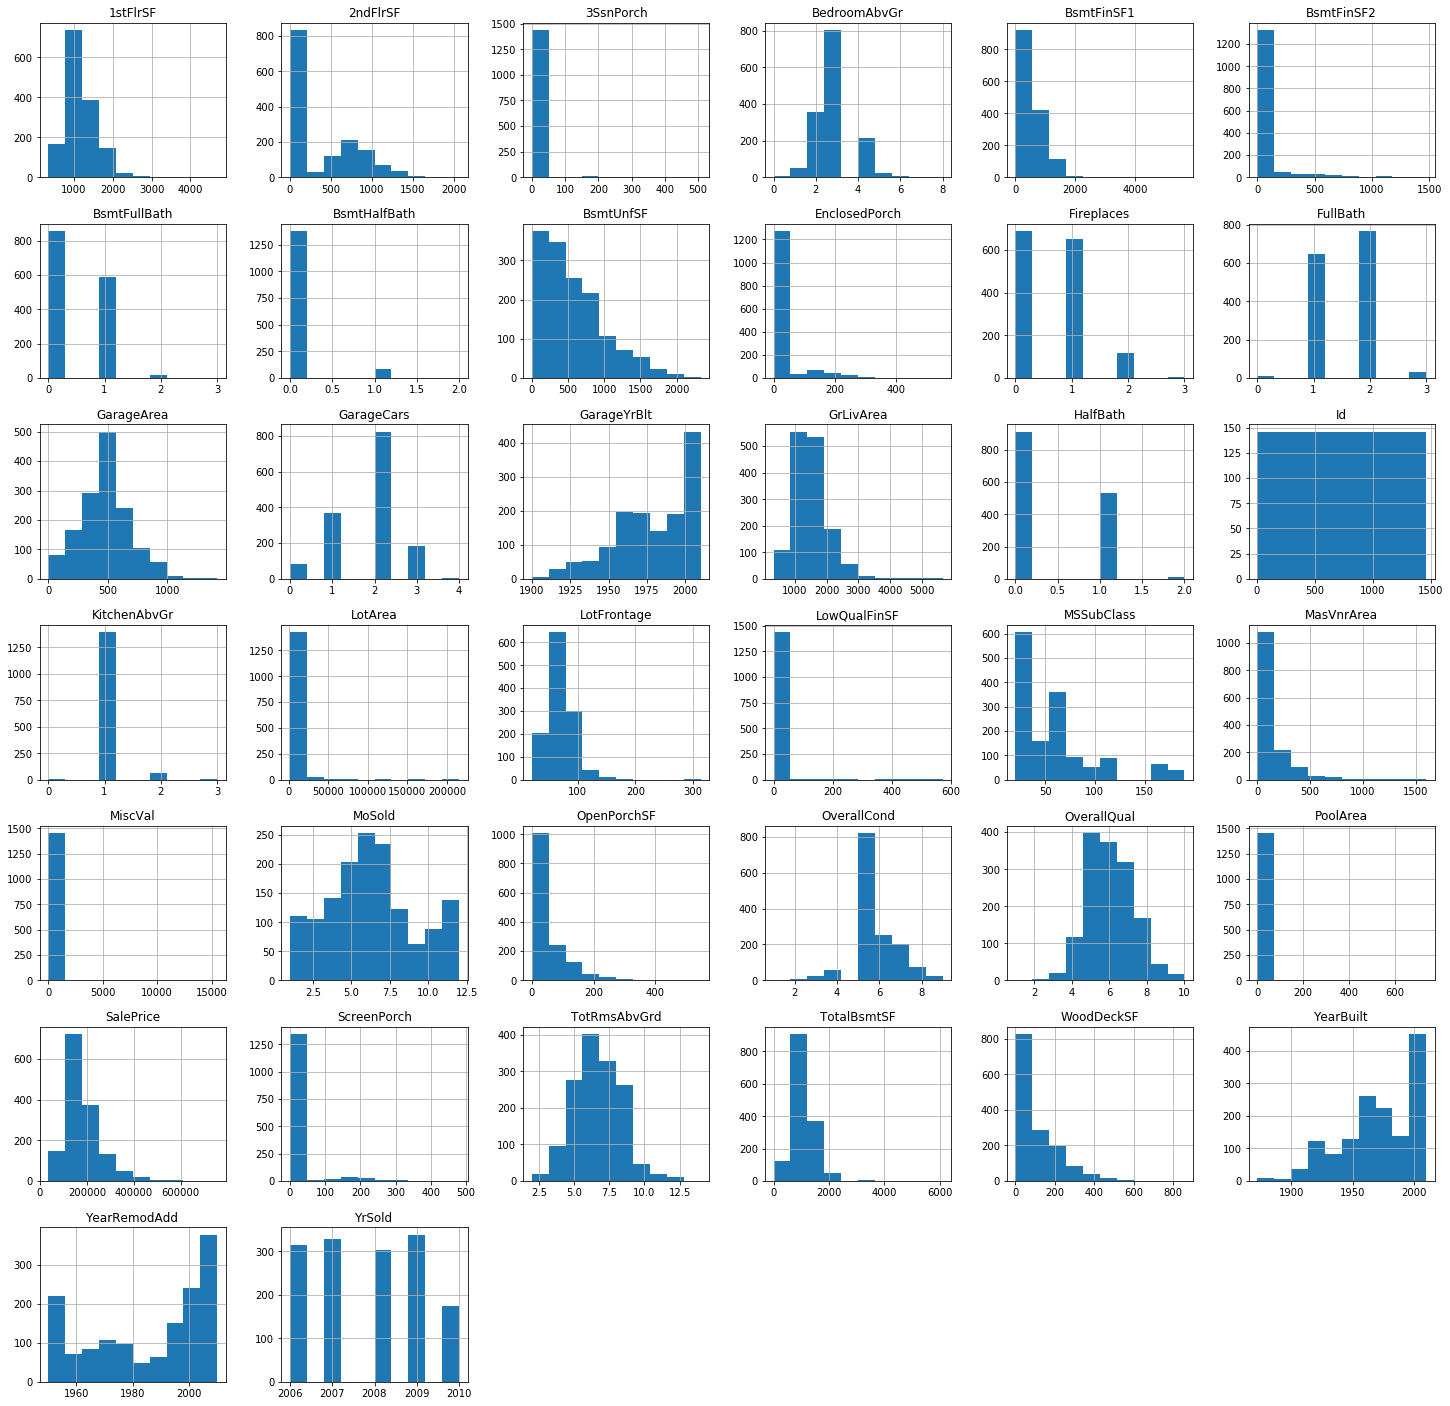

In [33]:
plt.figure(figsize=(25, 25))
df.hist();

In [41]:
nans = df.isna().sum()
nans[nans != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [43]:
#drop: 'MiscFeature', 'Alley'
#Pool - convert to 0123
#Poolarea - площадь бассейна?


array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

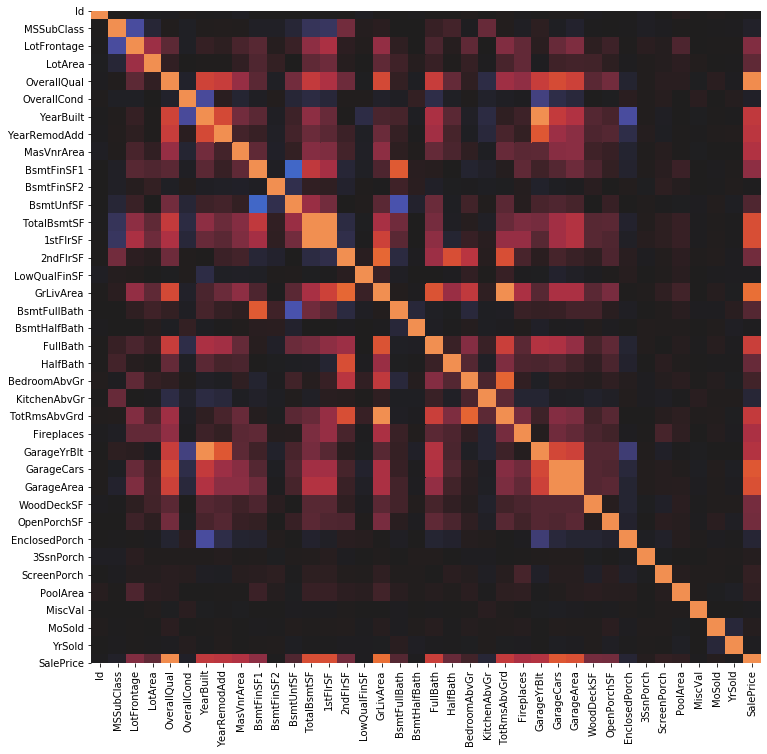

In [58]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=.8, center=0, square=True, cbar=False) #, annot=True);

In [50]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

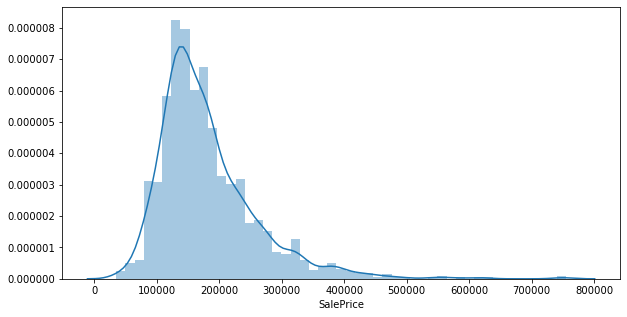

In [54]:
plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'])